In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.python.keras import activations
from tensorflow.python.keras.layers.core import Dropout



Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
train = '/Volumes/My Data/Dataset/400 Bird specis/train'
test = '/Volumes/My Data/Dataset/400 Bird specis/test'
validation = '/Volumes/My Data/Dataset/400 Bird specis/valid'
image_original_shape = (224,224)



In [3]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
validation_test_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory(
        train,
        target_size=image_original_shape,
        batch_size =16,
        class_mode='categorical',
        shuffle=True)
validation_data = validation_test_datagen.flow_from_directory(
        validation,
        target_size= image_original_shape,
        batch_size=16,
        class_mode='categorical',
        shuffle=False)
test_data = validation_test_datagen.flow_from_directory(
        test,
        target_size = image_original_shape,
        batch_size=16,
        class_mode='categorical',
        shuffle=False)        



Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


In [ ]:
model_custom = keras.Sequential([
    keras.layers.Conv2D(128,(5,5), padding ='same', input_shape=(224,224,3),
                        activation=('relu')),
    keras.layers.Conv2D(128,(3,3), activation ='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64,(3,3), activation =('relu')),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64,(3,3), activation =('relu')),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64,(3,3), activation =('relu')),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
#     keras.layers.Dense(512, activation='relu'),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(256, activation='relu'),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dropout(0.3),
    keras.layers.Dense(400, activation='softmax'),
    ])
model_custom.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

model_custom.fit( train_data , epochs = 5, batch_size = 16, validation_data = validation_data, )

In [4]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))

x = base_model.output
x = layers.Flatten()(x)
predictions = layers.Dense(400, activation='softmax')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
#model.summary()

for layer in base_model.layers:
    layer.trainable=False


model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Metal device set to: Apple M1 Pro


2022-02-20 11:30:14.854062: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-20 11:30:14.854452: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
history = model.fit(train_data , epochs = 5, batch_size = 16, validation_data = validation_data, )

Epoch 1/5
3650/3650 [==============================] - 413s 113ms/step - loss: 39.5501 - accuracy: 0.6428 - val_loss: 14.1368 - val_accuracy: 0.8110
Epoch 2/5
3650/3650 [==============================] - 413s 113ms/step - loss: 38.9011 - accuracy: 0.6576 - val_loss: 15.7204 - val_accuracy: 0.7980
Epoch 3/5
3650/3650 [==============================] - 414s 114ms/step - loss: 38.2346 - accuracy: 0.6686 - val_loss: 15.7272 - val_accuracy: 0.8125
Epoch 4/5
3650/3650 [==============================] - 415s 114ms/step - loss: 37.8578 - accuracy: 0.6791 - val_loss: 14.5831 - val_accuracy: 0.8365
Epoch 5/5
3650/3650 [==============================] - 419s 115ms/step - loss: 36.7810 - accuracy: 0.6936 - val_loss: 12.7300 - val_accuracy: 0.8480


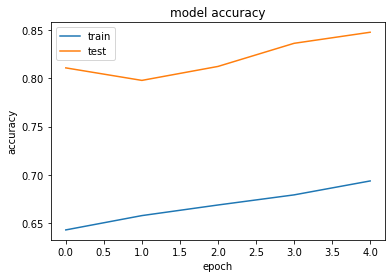

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

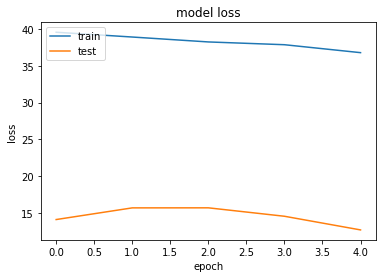

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()